#### Imports

In [1]:
# Install the statsmodels package


from statsmodels.tsa.ar_model import AutoReg # AR model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,median_absolute_error
import matplotlib.pyplot as plt
from arima_models_family import ARIMAFamily
import constant
import warnings

warnings.filterwarnings("ignore")

#### Read data (Assume data is clean and processed)


In [2]:
data = pd.read_parquet(constant.file_path)

In [3]:
data

,open
Date,
2024-04-29,634.40
2024-04-30,624.20
2024-05-01,627.60
2024-05-02,624.20
2024-05-03,633.70
...,...
2025-04-24,404.00
2025-04-25,400.90
2025-04-26,402.45


In [4]:
# object initialization
obj_1 = ARIMAFamily(data)

# Split the data into train and test sets
x_train,x_test= obj_1.train_test_split(data,'count',20)

In [5]:
x_test

,open
Date,
2025-04-09,349.000000
2025-04-10,351.000000
2025-04-11,355.000000
2025-04-12,353.000000
2025-04-13,353.000000
2025-04-14,353.666667
2025-04-15,367.000000
2025-04-16,370.000000
2025-04-17,380.000000


### Model Fitting

In [5]:
# model = obj_1.fit_AutoReg(x_train,lags=15) # AR model
obj_1.fit_model(AutoReg,x_train,lags=15) # AR model

In [6]:
obj_1.predict(x_train, x_test)

            predictions      actual         mse       rmse      mape  \
2025-04-09   355.615888  349.000000  631.197055  25.123635  5.088074   
2025-04-10   350.575366  351.000000  631.197055  25.123635  5.088074   
2025-04-11   351.677244  355.000000  631.197055  25.123635  5.088074   
2025-04-12   352.510131  353.000000  631.197055  25.123635  5.088074   
2025-04-13   348.982316  353.000000  631.197055  25.123635  5.088074   
2025-04-14   353.824315  353.666667  631.197055  25.123635  5.088074   
2025-04-15   355.449054  367.000000  631.197055  25.123635  5.088074   
2025-04-16   356.114261  370.000000  631.197055  25.123635  5.088074   
2025-04-17   362.009730  380.000000  631.197055  25.123635  5.088074   
2025-04-18   356.145666  375.000000  631.197055  25.123635  5.088074   
2025-04-19   358.225585  375.000000  631.197055  25.123635  5.088074   
2025-04-20   363.246140  376.666667  631.197055  25.123635  5.088074   
2025-04-21   368.286591  386.100000  631.197055  25.123635  5.08

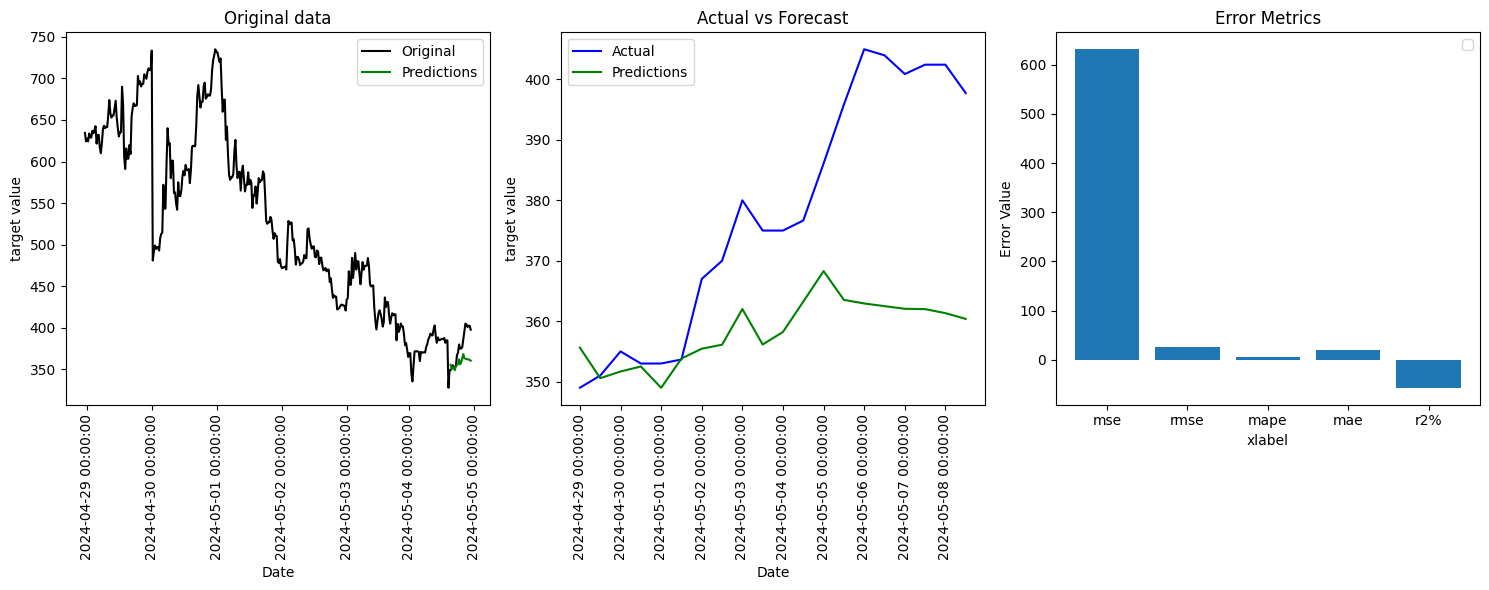

In [7]:

obj_1.data_plotting()

In [14]:
obj_1.fit_model(ARIMA,x_train,order=(0,0,15))

In [9]:
obj_1.predict(x_train, x_test)

            predictions      actual          mse       rmse       mape  \
2025-04-09   330.387022  349.000000  8623.346703  92.861977  22.000905   
2025-04-10   381.222195  351.000000  8623.346703  92.861977  22.000905   
2025-04-11   384.311360  355.000000  8623.346703  92.861977  22.000905   
2025-04-12   407.237130  353.000000  8623.346703  92.861977  22.000905   
2025-04-13   401.972984  353.000000  8623.346703  92.861977  22.000905   
2025-04-14   419.912490  353.666667  8623.346703  92.861977  22.000905   
2025-04-15   405.051207  367.000000  8623.346703  92.861977  22.000905   
2025-04-16   425.242950  370.000000  8623.346703  92.861977  22.000905   
2025-04-17   463.097178  380.000000  8623.346703  92.861977  22.000905   
2025-04-18   477.656672  375.000000  8623.346703  92.861977  22.000905   
2025-04-19   463.125916  375.000000  8623.346703  92.861977  22.000905   
2025-04-20   483.892916  376.666667  8623.346703  92.861977  22.000905   
2025-04-21   512.688658  386.100000  8

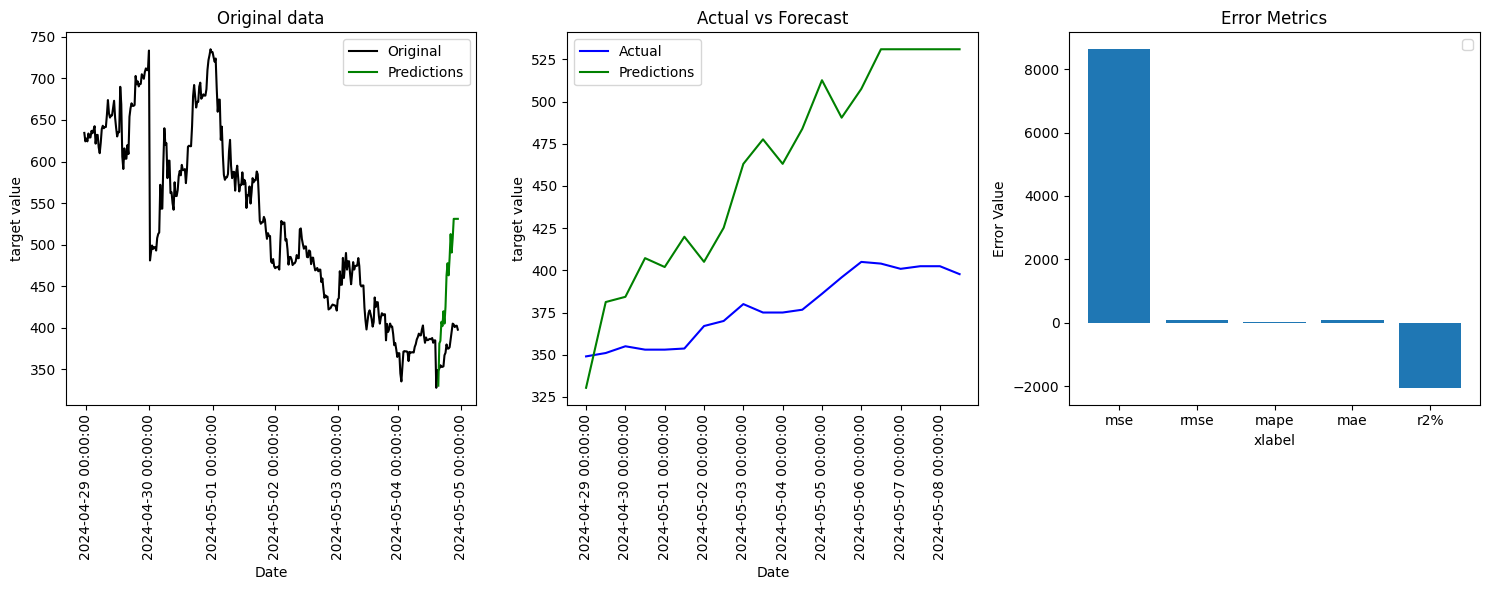

In [10]:
obj_1.data_plotting()